# Lección 2: Preparación

### Ejercicios de pair programming 27 de enero.

In [46]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [47]:
df = pd.read_csv("datos/airline_eda.csv", index_col=0).reset_index(drop = True)
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Distance
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,0,0,0,2,...,3,3,0,3,5,3,2,0,0,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,0,0,0,3,...,3,4,4,4,2,3,2,310,305,0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,0,0,0,3,...,2,3,3,4,4,4,2,0,0,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,0,0,0,3,...,1,1,0,1,4,1,3,0,0,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,0,0,0,3,...,2,2,0,2,4,2,5,0,0,0


#### 1. Estandarización.

In [48]:
df_num = df.select_dtypes(include=np.number)
df_num.columns

Index(['Age', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Distance'],
      dtype='object')

In [49]:
robust = RobustScaler()

In [50]:
robust.fit(df_num)

RobustScaler()

In [51]:
X_robust = robust.transform(df_num)

In [52]:
numericas_robust = pd.DataFrame(X_robust, columns = df_num.columns)
numericas_robust.head(2)

,Age,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Distance
0,1.041667,-1.5,-1.5,-1.5,-0.5,-0.5,0.0,-1.0,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,0.291667,-1.5,-1.5,-1.5,0.0,-1.5,-1.0,-1.0,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [53]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna Age es:  -0.023835142695821786
La desviación estándar de la columna Age es: 0.6299733312653976
-------------------------------------------------------------
La media de la columna Seat comfort es:  -0.08070141669233138
La desviación estándar de la columna Seat comfort es: 0.6964916216345249
-------------------------------------------------------------
La media de la columna Departure/Arrival time convenient es:  -0.004677394518016631
La desviación estándar de la columna Departure/Arrival time convenient es: 0.7636121851729799
-------------------------------------------------------------
La media de la columna Food and drink es:  -0.0740029257776409
La desviación estándar de la columna Food and drink es: 0.7218646932867699
-------------------------------------------------------------
La media de la columna Gate location es:  -0.0047890360332614726
La desviación estándar de la columna Gate location es: 0.6529849469925355
--------------------------------------------

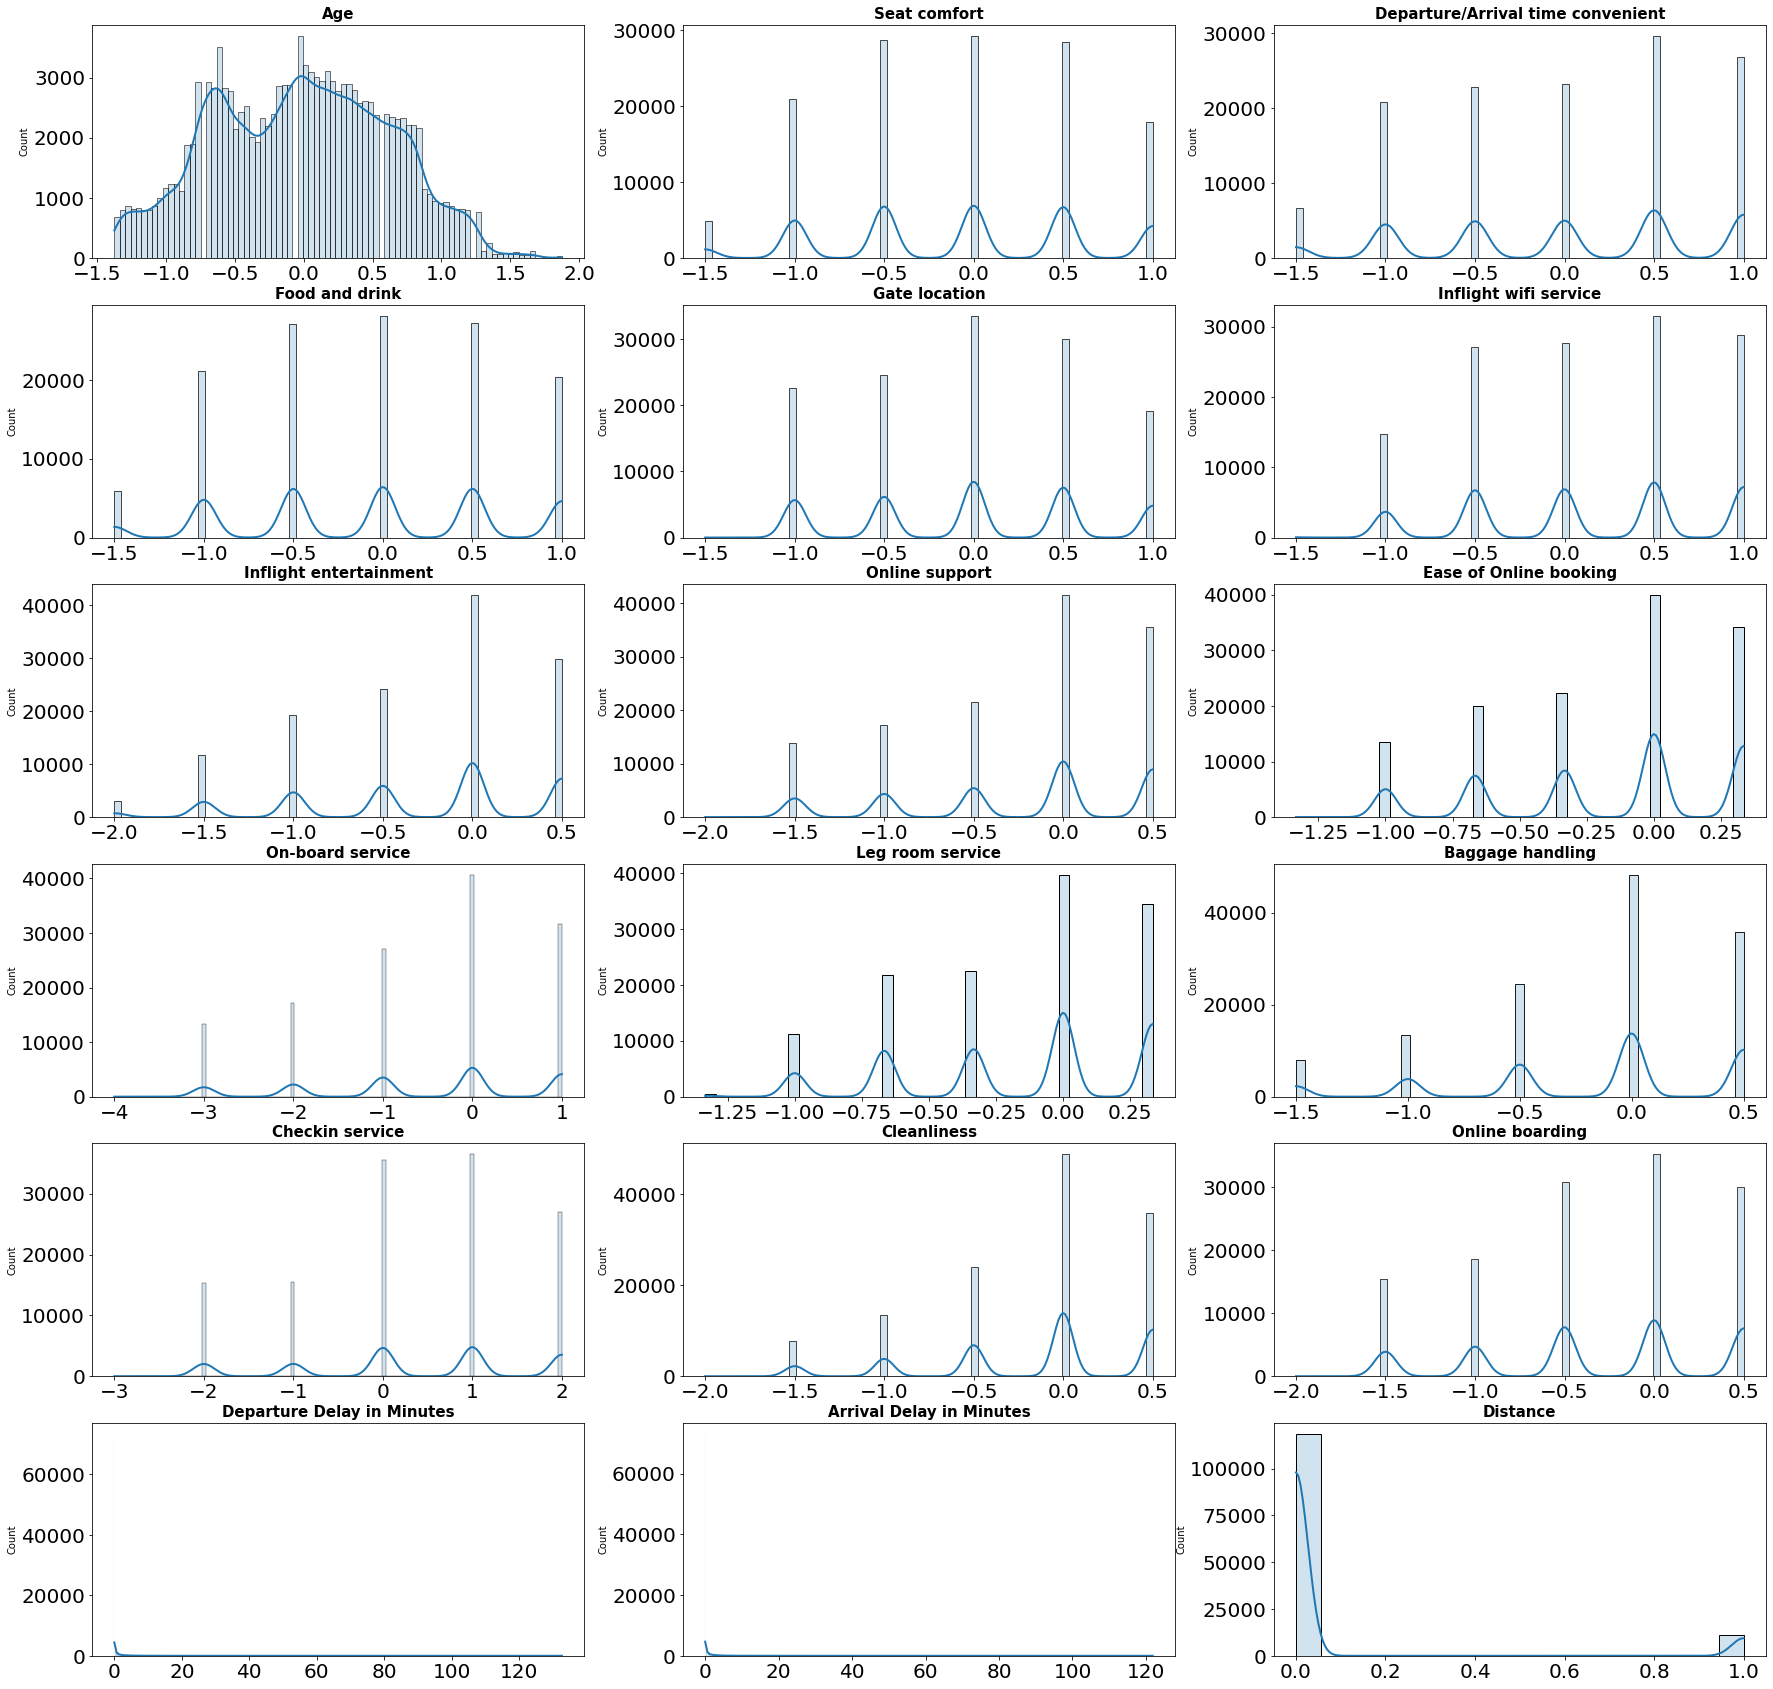

In [54]:
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (30, 30))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

In [55]:
df[numericas_robust.columns] = numericas_robust
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Distance
0,satisfied,Female,Loyal Customer,1.041667,Personal Travel,Eco,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,satisfied,Male,Loyal Customer,0.291667,Personal Travel,Business,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0
2,satisfied,Female,Loyal Customer,-1.041667,Personal Travel,Eco,-1.5,-1.5,-1.5,0.0,...,-0.666667,-1.0,-0.333333,0.0,1.0,0.0,-1.0,0.000000,0.000000,0.0
3,satisfied,Female,Loyal Customer,0.833333,Personal Travel,Eco,-1.5,-1.5,-1.5,0.0,...,-1.000000,-3.0,-1.333333,-1.5,1.0,-1.5,-0.5,0.000000,0.000000,0.0
4,satisfied,Female,Loyal Customer,1.250000,Personal Travel,Eco,-1.5,-1.5,-1.5,0.0,...,-0.666667,-2.0,-1.333333,-1.0,1.0,-1.0,0.5,0.000000,0.000000,0.0


#### 2. Codificación.

In [56]:
df_cat = df.select_dtypes(include="O")
df_cat.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [57]:
df['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [58]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [59]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [60]:
df['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [61]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [62]:
map_satis = {"satisfied":1, 'dissatisfied': 0}
map_gen = {"Female":1, 'Male': 0}
map_class = {"Eco":0, 'Eco Plus': 1, "Business": 2}
map_custom = {"Loyal Customer":1, 'disloyal Customer': 0}
map_type = {"Personal Travel":1, 'Business travel': 0}

In [63]:
df['satisfaction'] = df['satisfaction'].map(map_satis)
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Distance
0,1,Female,Loyal Customer,1.041667,Personal Travel,Eco,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,Male,Loyal Customer,0.291667,Personal Travel,Business,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [64]:
df['Gender'] = df['Gender'].map(map_gen)
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Distance
0,1,1,Loyal Customer,1.041667,Personal Travel,Eco,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,Loyal Customer,0.291667,Personal Travel,Business,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [65]:
df['Customer Type'] = df['Customer Type'].map(map_custom)
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Distance
0,1,1,1,1.041667,Personal Travel,Eco,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,Personal Travel,Business,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [66]:
df['Type of Travel'] = df['Type of Travel'].map(map_type)
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Distance
0,1,1,1,1.041667,1,Eco,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,1,Business,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [67]:
df['Class'] = df['Class'].map(map_class)
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Distance
0,1,1,1,1.041667,1,0,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,1,2,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


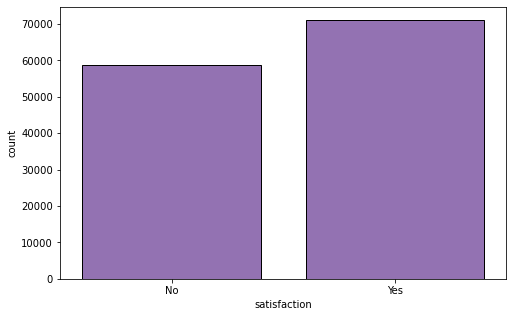

In [68]:
plt.figure(figsize=(8,5)) 

fig1 = sns.countplot(data = df, x = "satisfaction",  color = "C4",  edgecolor='black')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show()

In [69]:
# lo vemos también en porcentajes
df["satisfaction"].value_counts() / df.shape[0]

1    0.547328
0    0.452672
Name: satisfaction, dtype: float64

In [70]:
# guardamos la versión estandarizada y codificada

df.to_csv('datos/est_enc_airlines.csv')

In [71]:
df2 = pd.read_csv("datos/airline_eda.csv", index_col=0).reset_index(drop = True)
df2.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Distance
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,0,0,0,2,...,3,3,0,3,5,3,2,0,0,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,0,0,0,3,...,3,4,4,4,2,3,2,310,305,0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,0,0,0,3,...,2,3,3,4,4,4,2,0,0,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,0,0,0,3,...,1,1,0,1,4,1,3,0,0,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,0,0,0,3,...,2,2,0,2,4,2,5,0,0,0


In [72]:
df2_cat = df2.select_dtypes(include="O")
df2_cat.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [73]:
map_satis = {"satisfied":1, 'dissatisfied': 0}
map_gen = {"Female":1, 'Male': 0}
map_class = {"Eco":0, 'Eco Plus': 1, "Business": 2}
map_custom = {"Loyal Customer":1, 'disloyal Customer': 0}
map_type = {"Personal Travel":1, 'Business travel': 0}

In [74]:
df2['satisfaction'] = df2['satisfaction'].map(map_satis)
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Distance
0,1,1,1,1.041667,1,0,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,1,2,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [75]:
df2['Gender'] = df2['Gender'].map(map_gen)
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Distance
0,1,1,1,1.041667,1,0,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,1,2,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [76]:
df2['Customer Type'] = df2['Customer Type'].map(map_custom)
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Distance
0,1,1,1,1.041667,1,0,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,1,2,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [77]:
df2['Type of Travel'] = df2['Type of Travel'].map(map_type)
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Distance
0,1,1,1,1.041667,1,0,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,1,2,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [78]:
df2['Class'] = df2['Class'].map(map_class)
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Distance
0,1,1,1,1.041667,1,0,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,1,2,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0


In [79]:
df2.to_csv('datos/enc_airlines.csv')